In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [58]:
pd.set_option('display.max_columns', None)
unfiltered_data=pd.read_csv('../raw_data/cleaned_data_040321.csv',encoding='latin-1')

In [59]:
unfiltered_data.head()

,Unnamed: 0,UserLanguage,Dem_age,Dem_gender,Dem_edu,Dem_edu_mom,Dem_employment,Country,Dem_Expat,Dem_maritalstatus,Dem_dependents,Dem_riskgroup,Dem_isolation,Dem_isolation_adults,Dem_isolation_kids,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Corona_concerns_1,Corona_concerns_2,Corona_concerns_3,Corona_concerns_4,Corona_concerns_5,Trust_countrymeasure,Compliance_1,Compliance_2,Compliance_3,Compliance_4,Compliance_5,Compliance_6,BFF_15_1,BFF_15_2,BFF_15_3,BFF_15_4,BFF_15_5,BFF_15_6,BFF_15_7,BFF_15_8,BFF_15_9,BFF_15_10,BFF_15_11,BFF_15_12,BFF_15_13,BFF_15_14,BFF_15_15,Expl_Distress_1,Expl_Distress_2,Expl_Distress_3,Expl_Distress_4,Expl_Distress_5,Expl_Distress_6,Expl_Distress_7,Expl_Distress_8,Expl_Distress_9,Expl_Distress_10,Expl_Distress_11,Expl_Distress_12,Expl_Distress_13,Expl_Distress_14,Expl_Distress_15,Expl_Distress_16,Expl_Distress_17,Expl_Distress_18,Expl_Distress_19,Expl_Distress_20,Expl_Distress_21,Expl_Distress_22,Expl_Distress_23,Expl_Distress_24,SPS_1,SPS_2,SPS_3,SPS_4,SPS_5,SPS_6,SPS_7,SPS_8,SPS_9,SPS_10,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg
0,1,UR,20,Male,"College degree, bachelor, master",None,Student,Pakistan,yes,Single,0.0,Yes,Life carries on with minor changes,missing,missing,3.0,3.0,1.0,5.0,2.0,3.0,4.0,4.0,2.0,1.0,3.0,1.0,3.0,3.0,10.0,5.0,4.0,4.0,2.0,4.0,5.0,1.0,2.0,4.0,4.0,5.0,5.0,6.0,3.0,3.0,2.0,4.0,2.0,2.0,2.0,5.0,5.0,5.0,2.0,5.0,6.0,5.0,2.0,4.0,6.0,5.0,2.0,5.0,6.0,5.0,99.0,4.0,5.0,4.0,6.0,99.0,99.0,99.0,99.0,1.0,1.0,4.0,5.0,5.0,5.0,4.0,4.0,1.0,2.0,2.0,4.0,99.0,5.0,4.0,5.0,6.0,6.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,2.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0,1.0,2.0,3.0,4.0,2.0,3.0,2.2,2.333333,2.000000,5.000000,5.333333,5.000000,5.000000,5.0
1,5,IT,68,Male,"College degree, bachelor, master",College degree,Retired,Italy,no,Married/cohabiting,0.0,No,Life carries on with minor changes,1.0,0.0,1.0,2.0,3.0,4.0,4.0,2.0,4.0,4.0,2.0,3.0,2.0,2.0,3.0,7.0,7.0,7.0,7.0,8.0,8.0,7.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,1.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,99.0,2.0,99.0,5.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,4.0,2.0,2.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.1,2.333333,3.333333,3.666667,4.333333,4.000000,3.666667,5.0
2,6,SAR,29,Other/would rather not say,"Some College, short continuing education or eq...",Some College or equivalent,Part time employed,Argentina,no,Other or would rather not say,1.0,Yes,Isolated,0.0,1.0,2.0,2.0,3.0,4.0,3.0,3.0,5.0,3.0,2.0,2.0,4.0,1.0,3.0,6.0,7.0,3.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,99.0,5.0,2.0,5.0,3.0,99.0,2.0,5.0,2.0,4.0,2.0,4.0,5.0,99.0,2.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,5.0,4.0,4.0,2.0,5.0,2.0,2.3,2.666667,3.666667,3.666667,5.000000,4.666667,4.666667,4.0
3,7,SAR,38,Female,Up to 12 years of school,Up to 12 years of school,Not employed,Argentina,no,Married/cohabiting,1.0,Yes,Life carries on with minor changes,1.0,0.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,5.0,7.0,3.0,5.0,4.0,3.0,4.0,6.0,4.0,4.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,2.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,2.0,2.0,5.0,5.0,4.0,5.

## Gender Encoding

In [2]:
ohe_sex = OneHotEncoder(sparse = False)
ohe_sex.fit(unfiltered_data[['Dem_gender']]) 

ohe_sex.categories_

unfiltered_data[['Female','Male','Other']]= ohe_sex.transform(unfiltered_data[['Dem_gender']])
unfiltered_data.drop(columns='Dem_gender',inplace=True)


##############  Dem_edu

unfiltered_data['Dem_edu'] = unfiltered_data['Dem_edu'].replace({'Uninformative response':0,'None':1,'Up to 6 years of school':2, 'Up to 9 years of school':3, 'Up to 12 years of school':4, 'Some College, short continuing education or equivalent':5, 'College degree, bachelor, master': 6, 'PhD/Doctorate':7 })

##############  Dem_edu_mom

# unfiltered_data['Dem_edu_mom'].value_counts()

unfiltered_data['Dem_edu_mom'] = unfiltered_data['Dem_edu_mom'].replace({'Uninformative response':0,'None':1,'Up to 6 years of school':2, 'Up to 9 years of school':3, 'Up to 12 years of school':4, 'Some College or equivalent':5, 'College degree': 6, 'PhD/Doctorate':7 })

### Dem_riskgroup

unfiltered_data['Dem_riskgroup'] = unfiltered_data['Dem_riskgroup'].replace({'No':1,'Not sure':2, 'Yes':3})

## Dem_maritalstatus

ohe_marital = OneHotEncoder(sparse = False)
ohe_marital.fit(unfiltered_data[['Dem_maritalstatus']]) 
ohe_marital.categories_

unfiltered_data[['Divorced/widowed','Married/cohabiting','Other or would rather not say','Single','Uninformative response']]= ohe_marital.transform(unfiltered_data[['Dem_maritalstatus']])

unfiltered_data.drop(columns='Dem_maritalstatus',inplace=True)

##### Dem_Expat

unfiltered_data['Dem_Expat'] = unfiltered_data['Dem_Expat'].replace({'no':0,'yes':1})

##### Dem_isolation

ohe_isolation = OneHotEncoder(sparse = False)
ohe_isolation.fit(unfiltered_data[['Dem_isolation']]) 
# ohe_isolation.categories_

unfiltered_data[['no opinion','Isolated','Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes']]= ohe_isolation.transform(unfiltered_data[['Dem_isolation']])

unfiltered_data.drop(columns='Dem_isolation',inplace=True)

## Dem_employement

ohe_employment = OneHotEncoder(sparse = False)
ohe_employment.fit(unfiltered_data[['Dem_employment']]) 
# ohe_employment.categories_

unfiltered_data[['Full time employed','Not employed','Part time employed','Retired','Self-employed','Student']]= ohe_employment.transform(unfiltered_data[['Dem_employment']])

unfiltered_data.drop(columns='Dem_employment',inplace=True)

In [27]:
unfiltered_data.columns

Index(['Unnamed: 0', 'UserLanguage', 'Dem_age', 'Dem_edu', 'Dem_edu_mom',
       'Country', 'Dem_Expat', 'Dem_dependents', 'Dem_riskgroup',
       'Dem_isolation_adults',
       ...
       'Isolated', 'Isolated in medical facility of similar location',
       'Life carries on as usual', 'Life carries on with minor changes',
       'Full time employed', 'Not employed', 'Part time employed', 'Retired',
       'Self-employed', 'Student'],
      dtype='object', length=141)

In [28]:
unfiltered_data.drop(columns=['Unnamed: 0','UserLanguage'],inplace=True)

unfiltered_data.head()

new_df=unfiltered_data.drop(columns=['Country','Dem_isolation_adults','Dem_isolation_kids'])

# for i in new_df.columns:
#     print (i)

# SMALLER DF

In [32]:
new_df = new_df.sample(45000)

In [33]:
new_df.head()

,Dem_age,Dem_edu,Dem_edu_mom,Dem_Expat,Dem_dependents,Dem_riskgroup,Scale_PSS10_UCLA_1,Scale_PSS10_UCLA_2,Scale_PSS10_UCLA_3,Scale_PSS10_UCLA_4,Scale_PSS10_UCLA_5,Scale_PSS10_UCLA_6,Scale_PSS10_UCLA_7,Scale_PSS10_UCLA_8,Scale_PSS10_UCLA_9,Scale_PSS10_UCLA_10,Scale_SLON_1,Scale_SLON_2,Scale_SLON_3,OECD_people_1,OECD_people_2,OECD_insititutions_1,OECD_insititutions_2,OECD_insititutions_3,OECD_insititutions_4,OECD_insititutions_5,OECD_insititutions_6,Corona_concerns_1,Corona_concerns_2,Corona_concerns_3,Corona_concerns_4,Corona_concerns_5,Trust_countrymeasure,Compliance_1,Compliance_2,Compliance_3,Compliance_4,Compliance_5,Compliance_6,BFF_15_1,BFF_15_2,BFF_15_3,BFF_15_4,BFF_15_5,BFF_15_6,BFF_15_7,BFF_15_8,BFF_15_9,BFF_15_10,BFF_15_11,BFF_15_12,BFF_15_13,BFF_15_14,BFF_15_15,Expl_Distress_1,Expl_Distress_2,Expl_Distress_3,Expl_Distress_4,Expl_Distress_5,Expl_Distress_6,Expl_Distress_7,Expl_Distress_8,Expl_Distress_9,Expl_Distress_10,Expl_Distress_11,Expl_Distress_12,Expl_Distress_13,Expl_Distress_14,Expl_Distress_15,Expl_Distress_16,Expl_Distress_17,Expl_Distress_18,Expl_Distress_19,Expl_Distress_20,Expl_Distress_21,Expl_Distress_22,Expl_Distress_23,Expl_Distress_24,SPS_1,SPS_2,SPS_3,SPS_4,SPS_5,SPS_6,SPS_7,SPS_8,SPS_9,SPS_10,Expl_Coping_1,Expl_Coping_2,Expl_Coping_3,Expl_Coping_5,Expl_Coping_6,Expl_Coping_7,Expl_Coping_8,Expl_Coping_9,Expl_Coping_10,Expl_Coping_11,Expl_Coping_12,Expl_Coping_13,Expl_Coping_14,Expl_Coping_15,Expl_Coping_16,Expl_media_1,Expl_media_2,Expl_media_3,Expl_media_4,Expl_media_5,Expl_media_6,PSS10_avg,SLON3_avg,neu,ext,ope,agr,con,SPS_avg,Female,Male,Other,Divorced/widowed,Married/cohabiting,Other or would rather not say,Single,Uninformative response,no opinion,Isolated,Isolated in medical facility of similar location,Life carries on as usual,Life carries on with minor changes,Full time employed,Not employed,Part time employed,Retired,Self-employed,Student
3204,46,5,3,0,1.0,3,3.0,3.0,4.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,3.0,4.0,4.0,7.0,9.0,7.0,10.0,8.0,7.0,8.0,8.0,5.0,5.0,4.0,5.0,4.0,3.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0,2.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0,1.0,5.0,6.0,5.0,4.0,5.0,6.0,5.0,4.0,6.0,2.0,5.0,2.0,6.0,99.0,5.0,4.0,6.0,6.0,6.0,99.0,4.0,2.0,5.0,3.0,99.0,6.0,5.0,6.0,1.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,2.0,3.0,1.0,1.0,4.0,3.0,4.0,5.0,5.0,2.0,4.0,4.0,6.0,6.0,6.0,4.0,5.0,2.0,3.0,3.666667,3.666667,4.000000,4.666667,5.666667,4.333333,4.700000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25659,32,5,5,0,0.0,1,2.0,2.0,1.0,4.0,3.0,2.0,5.0,4.0,1.0,1.0,5.0,1.0,2.0,4.0,5.0,5.0,5.0,5.0,8.0,6.0,6.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,1.0,4.0,2.0,5.0,4.0,4.0,4.0,4.0,5.0,1.0,2.0,4.0,6.0,5.0,2.0,6.0,5.0,2.0,2.0,4.0,2.0,4.0,1.0,2.0,2.0,4.0,2.0,2.0,5.0,5.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,4.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,5.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0,5.0,5.0,3.0,4.0,4.0,5.0,1.0,5.0,4.0,2.0,4.0,3.0,2.0,5.0,1.7,2.666667,2.666667,3.666667,3.333333,5.000000,5.333333,3.200000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
30623,45,5,4,0,2.0,3,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,2.0,2.0,1.0,1.0,1.0,2.0,8.0,1.0,7.0,2.0,4.0,1.0,2.0,6.0,6.0,6.0,6.0,6.0,1.0,1.0,5.0,5.0,2.0,1.0,1.0,6.0,4.0,4.0,6.0,5.0,4.0,6.0,6.0,6.0,3.0,5.0,6.0,5.0,3.0,5.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,2.6,1.000000,4.333333,4.666667,6.000000,5.000000,4.666667,4.911471,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
64118,20,6,5,0,0.0,3,2.0,2.0,1.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,2.0,3.0,4.0,5.0,8.0,6.0,6.0,6.0,7.0,9.0,6.0,5.0,5.0,5.0,5.0,5.0,0.0,6.0,6.0,6.0,2.0,4.0,4.0,3.0,5.0,5.0,5.0,6.0,1.0,5.0,4.0,4.0,5.0,4.0,5.0,6.0,2.0,6.0,4.0,5.0,99.0,6.0,3.0,5.0,1.0,2.0,99.0,5.0,6.0,4.0,5.0,3.0,99.0,3.0,2.0,5.0,2.0,5.0,3.0,1.0,5.0,99.0,6.0,6.0,5.0,6.0,5.0,5.0

# 3. Feature selection for PREDICTING "SLON3_avg"

In [ ]:
# SPS=['SPS_1','SPS_2','SPS_3','SPS_4','SPS_5','SPS_6','SPS_7','SPS_8','SPS_9','SPS_10']

In [132]:
X = new_df[['BFF_15_1','BFF_15_2','BFF_15_3','BFF_15_4','BFF_15_5','BFF_15_6','BFF_15_7','BFF_15_8','BFF_15_9','BFF_15_10','BFF_15_11',
           'BFF_15_12','BFF_15_13','BFF_15_14','BFF_15_15']].reset_index(drop=True)
y = new_df["SLON3_avg"]

In [133]:
# provisional_removed=["Dem_age","Dem_edu","Dem_riskgroup",'Female','Male','Other','Divorced/widowed',
#             'Married/cohabiting','Other or would rather not say','Single','Uninformative response','no opinion','Isolated',
#             'Isolated in medical facility of similar location','Life carries on as usual','Life carries on with minor changes',
#             'Full time employed','Not employed','Part time employed','Retired','Self-employed']

In [134]:
# names = [1, 2, 3]

# # df_3['Stress_Level'] = pd.cut(df_3['PSS10_avg'], 3, labels=names)
# y = pd.cut(y, 3, labels=names)

# "y" to rounded/integers 

In [136]:
y

3204     3.666667
25659    2.666667
30623    1.000000
64118    3.000000
14787    2.666667
           ...   
4746     1.333333
15142    3.666667
1953     1.666667
37402    2.000000
12809    3.666667
Name: SLON3_avg, Length: 45000, dtype: float64

In [137]:
y = y.round()

In [138]:
y = y.astype(int)

In [139]:
X.shape

(45000, 15)

# 4. Feature Scaling

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ORDINAL LOGISTIC REGRESSION

In [155]:
# pip install mord

In [156]:
# choose models
from sklearn.linear_model import LinearRegression, LogisticRegression
from mord import LogisticAT

# instantiate models
model_linear = LinearRegression()
# model_1vR = LogisticRegression(max_iter=10000,
#                                multi_class='ovr',
#                                class_weight='balanced')
# model_multi = LogisticRegression(max_iter=10000,
#                                  multi_class='multinomial',
#                                  solver='lbfgs',
#                                  class_weight='balanced')
model_ordinal = LogisticAT(alpha=0)  # alpha parameter set to zero to perform no regularisation

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import numpy as np

In [158]:
# divide df into features matrix and target vector
features = X_train
target = y_train

In [163]:
# target

In [160]:
MAE = make_scorer(mean_absolute_error)
folds = 5

print('Mean absolute error:' )
MAE_linear = cross_val_score(model_linear,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Linear regression: ', np.mean(MAE_linear))
# MAE_1vR = cross_val_score(model_1vR,
#     features,
#     target,
#     cv=folds,
#     scoring=MAE)
# print('Logistic regression (one versus rest): ', np.mean(MAE_1vR))
# MAE_multi = cross_val_score(model_multi,
#     features,
#     target,
#     cv=folds,
#     scoring=MAE)
# print('Logistic regression (multinomial): ', np.mean(MAE_multi))
MAE_ordinal = cross_val_score(model_ordinal,
    features,
    target,
    cv=folds,
    scoring=MAE)
print('Ordered logistic regression: ', np.mean(MAE_ordinal))

Mean absolute error:
Linear regression:  0.8071395338327776
Ordered logistic regression:  0.7706388888888889


In [161]:
from sklearn.metrics import accuracy_score

def acc_fun(target_true, target_fit):
    target_fit = np.round(target_fit)
    target_fit.astype('int')
    return accuracy_score(target_true, target_fit)

acc = make_scorer(acc_fun)
folds = 5

print('Accuracy:' )
acc_linear = cross_val_score(model_linear,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Linear regression: ', np.mean(acc_linear))
# acc_1vR = cross_val_score(model_1vR,
#     features,
#     target,
#     cv=folds,
#     scoring=acc)
# print('Logistic regression (one versus rest): ', np.mean(acc_1vR))
# acc_multi = cross_val_score(model_multi,
#     features,
#     target,
#     cv=folds,
#     scoring=acc)
# print('Logistic regression (multinomial): ', np.mean(acc_multi))
acc_ordinal = cross_val_score(model_ordinal,
    features,
    target,
    cv=folds,
    scoring=acc)
print('Ordered logistic regression: ', np.mean(acc_ordinal))

Accuracy:
Linear regression:  0.37194444444444447
Ordered logistic regression:  0.37480555555555556


# MODEL ORDINAL

In [72]:
model_ordinal.fit(X_train,y_train)

LogisticAT(alpha=0)

In [73]:
y_pred = model_ordinal.predict(X_test)

In [74]:
y_true = y_test
y_true

47445    3
37235    5
10158    2
45458    3
1890     3
        ..
10246    1
84488    4
82725    2
15750    3
76848    1
Name: SLON3_avg, Length: 9000, dtype: int64

In [75]:
y_true.reset_index(drop=True,inplace=True)

In [76]:
df_compare = pd.DataFrame()
df_compare['y_pred'] = y_pred
df_compare['y_true'] = y_true
df_compare.head(50)

,y_pred,y_true
0,4,3
1,2,5
2,2,2
3,2,3
4,3,3
5,3,3
6,2,3
7,3,4
8,3,3
9,3,2


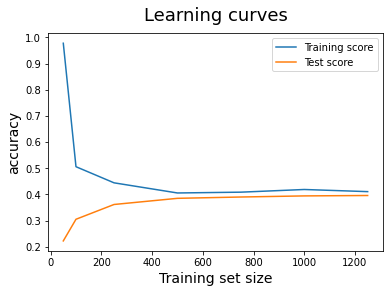

In [77]:
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = model_ordinal,
                                                              X = X,
                                                              y = y,
                                                              train_sizes = [50,100,250,500,750,1000,1250],
                                                              cv = 10,
                                                              scoring = 'accuracy')
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

# END HERE

In [234]:
# from sklearn.metrics import classification_report

# print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.00      0.00       415
           2       0.62      0.65      0.64      3997
           3       0.49      0.66      0.56      3385
           4       0.55      0.11      0.18      1154
           5       0.00      0.00      0.00        49

    accuracy                           0.55      9000
   macro avg       0.43      0.28      0.28      9000
weighted avg       0.55      0.55      0.52      9000



/home/antoniovmonge/.pyenv/versions/3.8.6/envs/psycovid/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/antoniovmonge/.pyenv/versions/3.8.6/envs/psycovid/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/antoniovmonge/.pyenv/versions/3.8.6/envs/psycovid/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

# other

In [96]:
# df['Dem_age'].hist(bins=20)

In [78]:
# y.hist(bins=100)

In [122]:
# names = ['Low', 'Medium', 'High']

# # df_3['Stress_Level'] = pd.cut(df_3['PSS10_avg'], 3, labels=names)
# y = pd.cut(y, 3, labels=names)

In [164]:
# y

# Hold Out

In [124]:
# from sklearn.model_selection import train_test_split

In [125]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Base Modelling

In [128]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

# model = LogisticRegression(max_iter=1000,n_jobs=-1)

# scores = cross_val_score(model, X_train, y_train, cv=10)

# base_model_score = scores.mean()

# base_model_score

0.5945842271197981

In [118]:
# X_train.describe()

,BFF_15_1,BFF_15_2,BFF_15_3,BFF_15_4,BFF_15_5,BFF_15_6,BFF_15_7,BFF_15_8,BFF_15_9,BFF_15_10,BFF_15_11,BFF_15_12,BFF_15_13,BFF_15_14,BFF_15_15,Dem_age,Dem_edu,Dem_riskgroup,Female,Male,Other,Divorced/widowed,Married/cohabiting,Other or would rather not say,Single,Uninformative response,no opinion,Isolated,Isolated in medical facility of similar location,Life carries on as usual,Life carries on with minor changes,Full time employed,Not employed,Part time employed,Retired,Self-employed
count,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000,57277.000000
mean,3.834419,3.434939,4.288755,4.384779,4.050841,3.621314,4.374339,4.706531,4.420780,2.763867,4.350961,4.725876,4.460499,3.195803,4.751279,38.931438,5.510013,2.455052,0.720813,0.268956,0.010231,0.073729,0.544197,0.038637,0.343035,0.000402,0.000140,0.372855,0.001030,0.050841,0.575135,0.478918,0.087051,0.094244,0.069452,0.104527
std,1.399730,1.392446,1.165276,1.281975,1.397335,1.396412,1.114153,1.197252,1.255422,1.269772,1.123300,0.982803,1.146201,1.401359,0.943001,13.771971,1.060216,0.848660,0.448604,0.443421,0.100630,0.261332,0.498047,0.192729,0.474727,0.020035,0.011818,0.483568,0.032079,0.219674,0.494327,0.499560,0.281912,0.292170,0.254223,0.305946
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,2.000000,4.000000,28.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,3.000000,5.000000,37.000000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,49.000000,6.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,92.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
# y_train

41485    3.0
1661     2.0
54661    3.0
33560    2.0
23257    2.0
        ... 
6265     1.0
54886    2.0
76820    3.0
860      2.0
15795    2.0
Name: PSS10_avg, Length: 57277, dtype: float64

# KNeighborsClassifier

In [79]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_validate

# # Instanciate the model
# knn_model = KNeighborsClassifier(n_neighbors=5)

# # Train the model on the scaled Training data
# cv_results = cross_validate(knn_model, X_train,y_train)

# base_knn_score = cv_results['test_score'].mean()

# base_knn_score

# # scores = cross_val_score(model, X_train, y_train, cv=10)

# # base_model_score = scores.mean()

# # base_model_score

0.3369722222222222

# Feature permutation in Sklearn

In [ ]:
# from sklearn.inspection import permutation_importance

# log_model = LogisticRegression(max_iter=1000).fit(X, y) # Fit model

# permutation_score = permutation_importance(log_model, X, y, n_repeats=100) # Perform Permutation

# importance_df = pd.DataFrame(np.vstack((X.columns,
#                                         permutation_score.importances_mean)).T) # Unstack results
# importance_df.columns=['feature','score decrease']

# importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

In [1]:
from sklearn import set_config; set_config(display='diagram')

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Impute then Scale for numerical variables: 
num_transformer = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

# Encode categorical variables
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Paralellize "num_transformer" and "One hot encoder"
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ['age','bmi']),
    ('cat_transformer', cat_transformer, ['smoker', 'region'])])

In [4]:
preprocessor

ColumnTransformer(transformers=[('num_transformer',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'bmi']),
                                ('cat_transformer',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['smoker', 'region'])])